# Manasjyoti Baishya

# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv (r"C:\Users\Asus\Desktop\The Spark Foundation\terrorism\terrorism.csv")
data.head()

d:\user file\softwares_installed\python\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Selecting columns as per choice

In [3]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data['Casualities'] = data.Killed + data.Wounded

In [4]:
print (data.columns)

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casualities'],
      dtype='object', length=136)


In [5]:
data=data[['Day','Month','Year','Region','City','State','Country','latitude','longitude','AttackType','Target','Summary','Group','Target_type','Weapon_type','Motive','Killed',
               'Wounded','Casualities']]
data.head()

,Day,Month,Year,Region,City,State,Country,latitude,longitude,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive,Killed,Wounded,Casualities
0,2,7,1970,Central America & Caribbean,Santo Domingo,NaN,Dominican Republic,18.456792,-69.951164,Assassination,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,0.0,1.0
1,0,0,1970,North America,Mexico city,Federal,Mexico,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,0.0,0.0
2,0,1,1970,Southeast Asia,Unknown,Tarlac,Philippines,15.478598,120.599741,Assassination,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0,0.0,1.0
3,0,1,1970,Western Europe,Athens,Attica,Greece,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN,NaN,NaN
4,0,1,1970,East Asia,Fukouka,Fukouka,Japan,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,NaN,NaN


In [6]:
data.shape

(181691, 19)

In [7]:
data1=data.dropna()
data1.shape

(46556, 19)

# Visualising data

In [8]:
import matplotlib.pyplot as plot
import seaborn as sns

# Number Of Terrorist Activities Each Year

d:\user file\softwares_installed\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


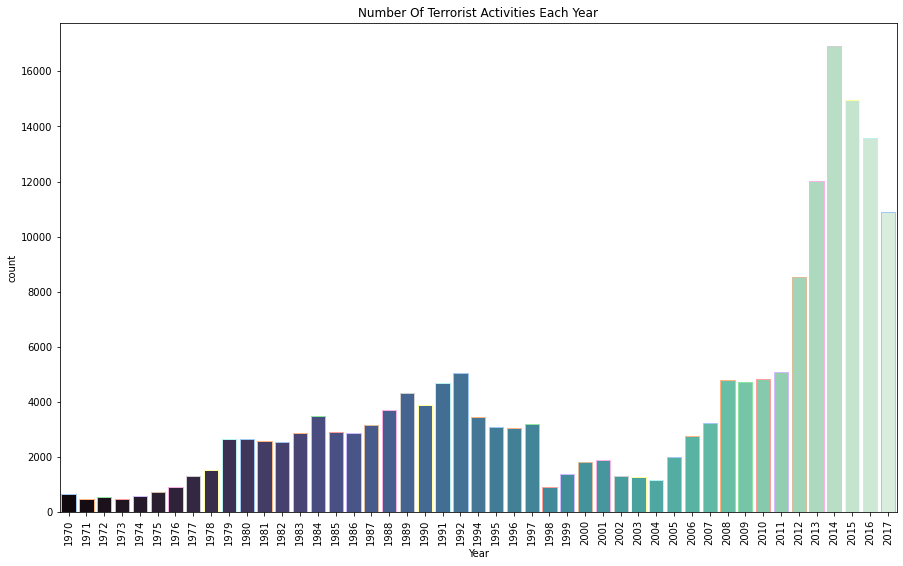

In [9]:
plot.subplots(figsize=(15,9))
sns.countplot('Year',data=data,palette='mako',edgecolor=sns.color_palette('pastel',12))
plot.xticks(rotation=90)
plot.title('Number Of Terrorist Activities Each Year')
plot.show()

# Number Of Casualities Each Year

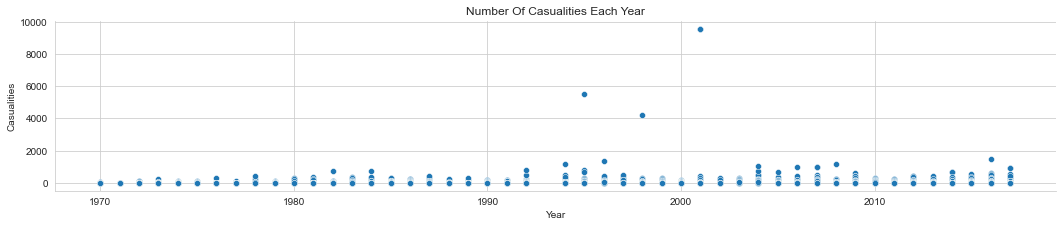

In [10]:
sns.axes_style("whitegrid")
sns.set_style("whitegrid")
sns.pairplot(data,height=3,aspect=5,x_vars=["Year"],y_vars=["Casualities"])
plot.title('Number Of Casualities Each Year')
plot.show()

# Number Of Total Casualities in Each Country

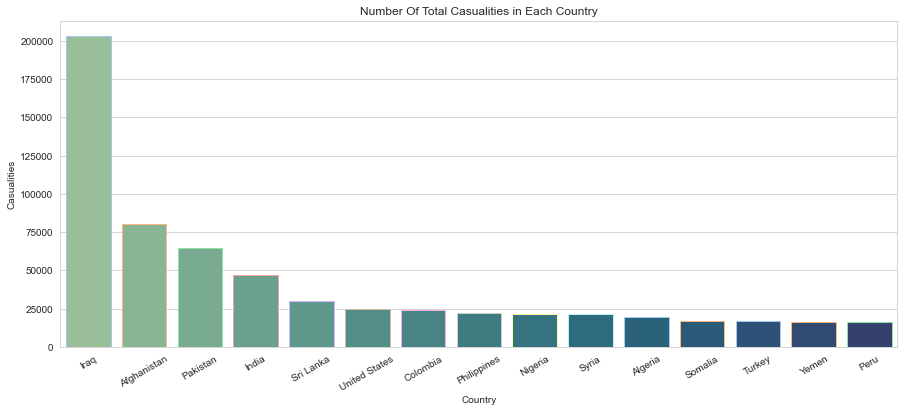

In [11]:
plot.subplots(figsize=(15,6))
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'crest',edgecolor=sns.color_palette('pastel',12))
plot.xticks(rotation=30)
plot.title('Number Of Total Casualities in Each Country')
plot.show()

# Number Of Total Attacks in Each Country

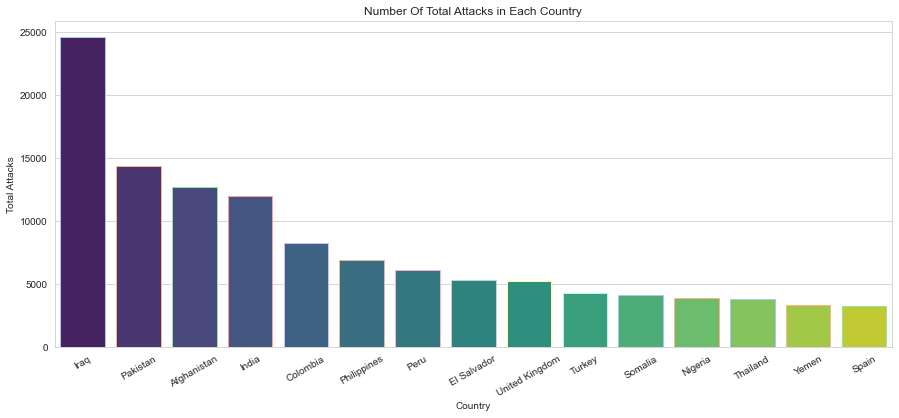

In [12]:
plot.subplots(figsize=(15,6))
country_attacks = data.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'viridis',edgecolor=sns.color_palette('pastel',12))
plot.xticks(rotation=30)
plot.title('Number Of Total Attacks in Each Country')
plot.show()

# Top Countries Affected

d:\user file\softwares_installed\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


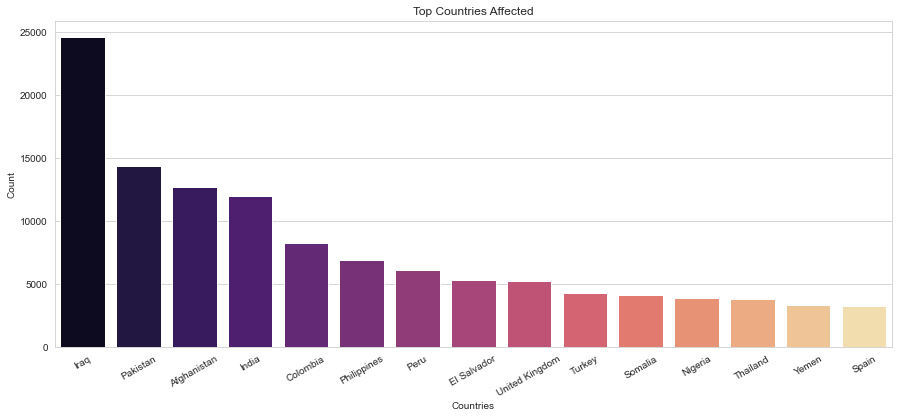

In [13]:
plot.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='magma')
plot.title('Top Countries Affected')
plot.xlabel('Countries')
plot.ylabel('Count')
plot.xticks(rotation= 30)
plot.show()

# Number Of Total Attacks by Attack Type

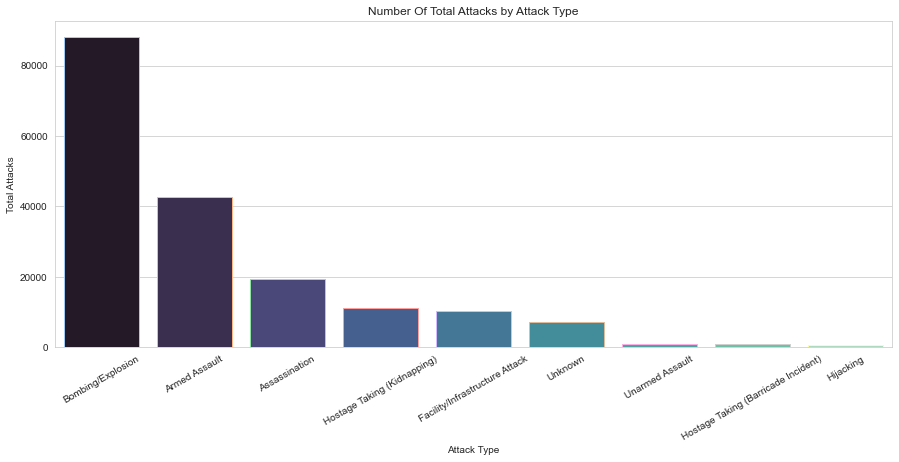

In [14]:
attack_type = data.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plot.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'],y=attack_type['Total Attacks'],palette='mako',edgecolor=sns.color_palette('pastel', 12))
plot.xticks(rotation=30)
plot.title('Number Of Total Attacks by Attack Type')
plot.show()

# Number Of Total Attacks by Terrorist Group

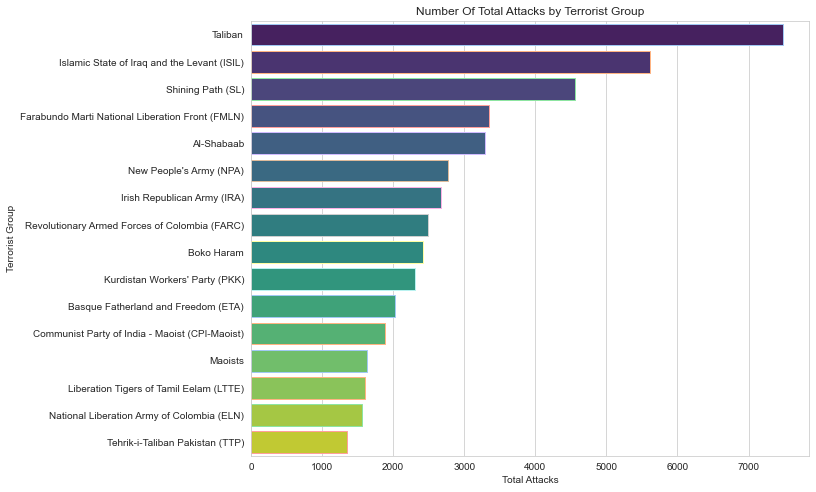

In [15]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plot.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'],x=group_attacks['Total Attacks'],palette='viridis',edgecolor=sns.color_palette('pastel', 12))
plot.title('Number Of Total Attacks by Terrorist Group')
plot.show()

# Important numerical data

In [16]:
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [17]:
attackData = data.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [18]:
countryData = data.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [19]:
group_attacks = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


# Thank You!